In [9]:
# Install the required packages
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DecisionTree")
Pkg.add("GLM")
Pkg.add("MLDataUtils")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("ScikitLearn")
Pkg.add("Statistics")


# Load the packages we'll be using
using CSV
using DataFrames
using DecisionTree
using GLM
using MLDataUtils
using Plots
using ScikitLearn, Random, Statistics

# prettier plots
gr()

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Res

Plots.GRBackend()

In [2]:
# first task -- load the data we need
df = CSV.read("data.csv")

# show a view of the data
df[1:5, :]

,Column1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
,Int64⍰,Int64⍰,String⍰,Int64⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,String⍰
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",missing,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
2,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",missing,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
3,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",missing,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
4,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",missing,2020,6'4,168lbs,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
5,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",missing,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,9

In [3]:
function value_to_numeric(value)
    # convert string numbers to numeric values
    if value[end] == 'M'
        multiplier = 1000000
    else
        multiplier = 1000
    end
    # extract the string...
    value_string = String("0")
    for i = firstindex(value) + 1:lastindex(value) - 1
        try
            value_string *= value[i]
        catch
            # catch unreadable carachters (issue with Julia?)
        end   
    end
    
    value_numeric = parse(Float64, value_string) * multiplier
    return value_numeric
end 

value_to_numeric (generic function with 1 method)

In [4]:
# convert y column to numeric
df[:ValueNumeric] = map(value_to_numeric, df[:Value])

# perform a train/test split
train_names, test_names = splitobs(shuffleobs(df[:Name]))
df[:IsTest] = map(x -> x in test_names, df[:Name])
df_train = df[df[:IsTest] .== false, :]
df_test = df[df[:IsTest] .== true, :];

In [17]:
f = @formula(ValueNumeric ~ Crossing
                          + Finishing
                          + HeadingAccuracy
                            + ShortPassing
                            + Volleys
                            + Dribbling
                            + Curve
                            + FKAccuracy
                            + LongPassing
                            + BallControl 
                            + Acceleration 
                            + SprintSpeed 
                            + Agility 
                            + Reactions
                            + Balance
                            + ShotPower
                            + Jumping
                            + Stamina
                            + Strength
                            + LongShots
                            + Aggression
                            + Interceptions
                            + Positioning
                            + Vision
                            + Penalties
                            + Composure
                            + Marking
                            + StandingTackle 
                            + SlidingTackle 
                            + GKDiving
                            + GKHandling
                            + GKKicking
                            + GKPositioning
                            + GKReflexes)
ols_model = lm(f, df_train)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: ValueNumeric ~ 1 + Crossing + Finishing + HeadingAccuracy + ShortPassing + Volleys + Dribbling + Curve + FKAccuracy + LongPassing + BallControl + Acceleration + SprintSpeed + Agility + Reactions + Balance + ShotPower + Jumping + Stamina + Strength + LongShots + Aggression + Interceptions + Positioning + Vision + Penalties + Composure + Marking + StandingTackle + SlidingTackle + GKDiving + GKHandling + GKKicking + GKPositioning + GKReflexes

Coefficients:
                   Estimate Std.Error   t value Pr(>|t|)
(Intercept)      -2.35153e7 5.47906e5  -42.9185   <1e-99
Crossing           -25528.4   5364.46   -4.7588    <1e-5
Finishing           26969.2   6849.27   3.93753    <1e-4
HeadingAccuracy     37528.7   5713.25   6.56871   <1e-10
ShortPassing        55880.3   9706.28   5.75713    <1e-8
Volleys             1975

Issues

- Train/test broken for dataframe as a whole

In [20]:
using GLM: predict

y_pred = predict(ols_model, df_test)

5961-element Array{Union{Missing, Float64},1}:
  1.535611625844759e7 
  1.41694365241588e7  
  1.5777935569304347e7
  1.1298359348387282e7
  1.0825827886958815e7
  1.3445432884509917e7
  1.202920243081459e7 
  1.3412547989046443e7
  1.0215021743886443e7
  1.1380736178339098e7
  1.0622131808361312e7
  1.1504073251532672e7
  9.945079777507108e6 
  ⋮                   
 -4.366206875293211e6 
 -3.639276273178516e6 
 -6.308754097191696e6 
 -3.213616939582309e6 
 -3.361527714172648e6 
 -5.179885515535357e6 
 -6.882703346533406e6 
 -3.0696660942220297e6
 -3.407745075620466e6 
 -3.0749282685053386e6
 -6.396400198344285e6 
 -2.9331909493990247e6

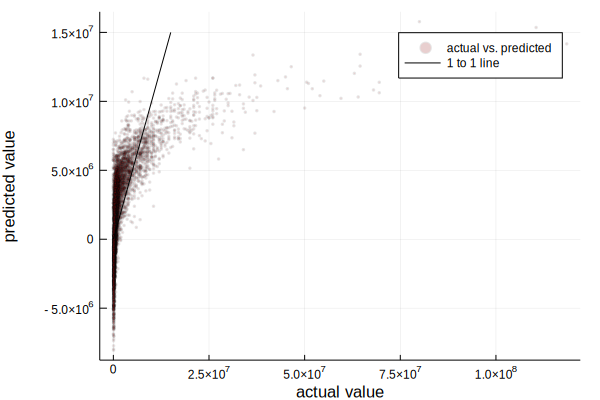

In [21]:
scatter(df_test[:ValueNumeric], y_pred, markersize=1, markercolor=:red, markeralpha=0.1,
        label="actual vs. predicted")
plot!([0, 1.5e7], [0, 1.5e7], linecolor=:black, label="1 to 1 line")
xlabel!("actual value")
ylabel!("predicted value")

### Finally try a more complex regressor to see if we do any better

In [5]:
X_columns = [:Crossing,       
             :Finishing,      
             :HeadingAccuracy,
             :ShortPassing,   
             :Volleys,        
             :Dribbling,      
             :Curve,          
             :FKAccuracy,     
             :LongPassing,    
             :BallControl,
             :Acceleration,
             :SprintSpeed, 
             :Agility,     
             :Reactions,   
             :Balance,     
             :ShotPower,   
             :Jumping,     
             :Stamina,    
             :Strength,    
             :LongShots,     
             :Aggression,    
             :Interceptions, 
             :Positioning,   
             :Vision,        
             :Penalties,     
             :Composure,     
             :Marking,       
             :StandingTackle,
             :SlidingTackle, 
             :GKDiving,      
             :GKHandling,    
             :GKKicking,     
             :GKPositioning, 
             :GKReflexes]


# select only the stats columns we want for regression
X_train = df_train[:, filter(x -> (x in X_columns), names(df))]
X_test = df_test[:, filter(x -> (x in X_columns), names(df))]
y_train = df_train[:ValueNumeric]
y_test = df_test[:ValueNumeric];

In [14]:
using ScikitLearn: fit!, predict

regressor = RandomForestRegressor()
fit!(regressor, X_train, y_train)
#y_pred = predict(X_test, y_test)

UndefVarError: UndefVarError: RandomForestRegressor not defined

### Broken things (Mar 2019):

- Train-test split on dataframe, rather than just column.
- Scikit-learn fit technique not working, even following an exact example on their github page. There appears to be no easy way of doing this; we have conflicting packages etc. which are all trying to import their own functions, and it gets very messy very quickly!